In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rasel180118/crops-disease-dataset

100% 1.34G/1.35G [01:32<00:00, 14.2MB/s]
100% 1.35G/1.35G [01:32<00:00, 15.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crops-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [6]:
train_path = '/content/Crops_disease_dataset/Train'
valid_path = '/content/Crops_disease_dataset/Val'
test_path = '/content/Crops_disease_dataset/Test'

In [7]:
# Define image dimensions and batch size
img_size = (224, 224)
batch_size = 32

In [8]:
# Create data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11951 images belonging to 22 classes.


In [10]:
# Create data generators without augmentation for validation and test data
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1495 images belonging to 22 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1497 images belonging to 22 classes.


In [13]:
# Load the pre-trained VGG16 model
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


58889256/58889256 [==============================] - 4s 0us/step


In [14]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [15]:
# Create a custom model on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
trainData = tf.keras.preprocessing.image_dataset_from_directory(train_path)

Found 11951 files belonging to 22 classes.


In [18]:
for image_batch, labels_batch in trainData.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 1 18 14  7  9 10 13 16 18  4 14 13 14  8 17 17 14 20  8 10 18 14 10 20
  6 18 19 14 14 20 11 17]


In [19]:
for image_batch, labels_batch in trainData.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [20]:
class_names = trainData.class_names
class_names

['Bean_angular_leaf_spot',
 'Bean_bean_rust',
 'Cauliflower_Alternaria_Leaf_Spot',
 'Cauliflower_Black_Rot',
 'Cauliflower_Cabbage aphid colony',
 'Cauliflower_Downy_Mildew',
 'Cauliflower_ring spot',
 'Paddy_Bacterial leaf blight',
 'Paddy_Brown spot',
 'Paddy_Leaf smut',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

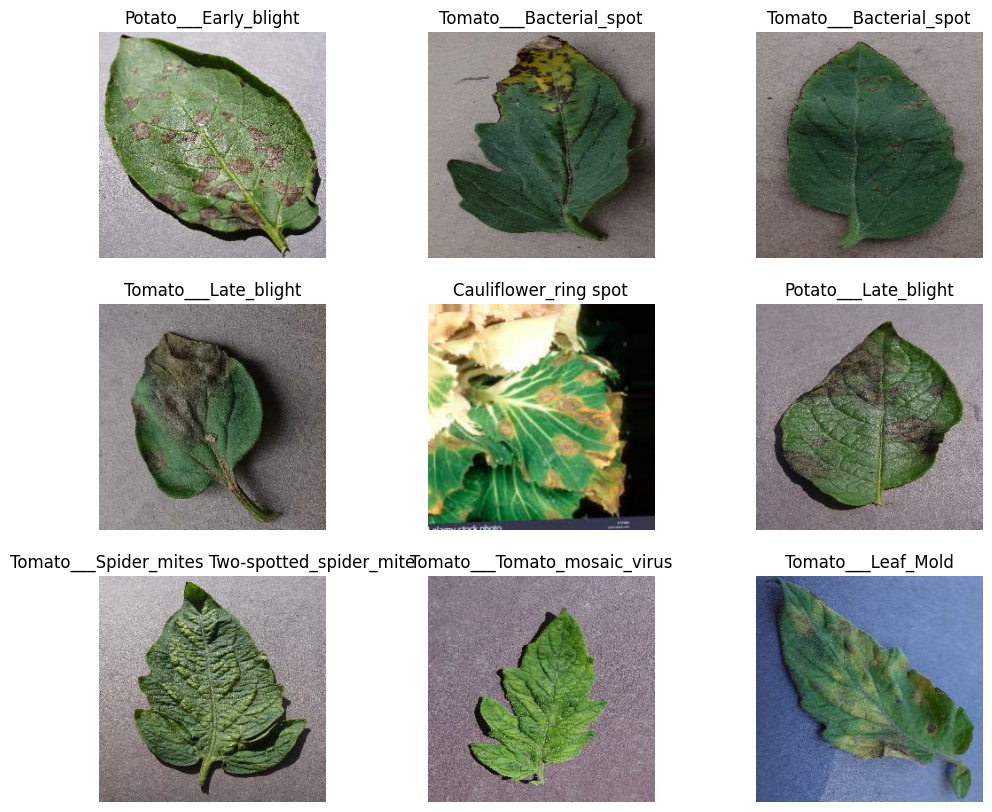

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
for image_batch, labels_batch in trainData.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [22]:
# Train the model
history = model.fit(
    train_generator,
    epochs=40,  #adjust as needed
    validation_data=valid_generator
)

Epoch 1/40
374/374 [==============================] - 259s 659ms/step - loss: 1.7158 - accuracy: 0.4725 - val_loss: 0.8330 - val_accuracy: 0.7037
Epoch 2/40
374/374 [==============================] - 230s 616ms/step - loss: 1.0852 - accuracy: 0.6189 - val_loss: 0.7301 - val_accuracy: 0.7545
Epoch 3/40
374/374 [==============================] - 214s 571ms/step - loss: 0.9541 - accuracy: 0.6565 - val_loss: 0.6363 - val_accuracy: 0.7699
Epoch 4/40
374/374 [==============================] - 212s 566ms/step - loss: 0.8808 - accuracy: 0.6889 - val_loss: 0.5188 - val_accuracy: 0.8020
Epoch 5/40
374/374 [==============================] - 215s 574ms/step - loss: 0.8335 - accuracy: 0.7040 - val_loss: 0.4690 - val_accuracy: 0.8448
Epoch 6/40
374/374 [==============================] - 216s 579ms/step - loss: 0.7897 - accuracy: 0.7140 - val_loss: 0.4297 - val_accuracy: 0.8415
Epoch 7/40
374/374 [==============================] - 211s 564ms/step - loss: 0.7619 - accuracy: 0.7242 - val_loss: 0.3967 -

In [23]:
import matplotlib.pyplot as plt

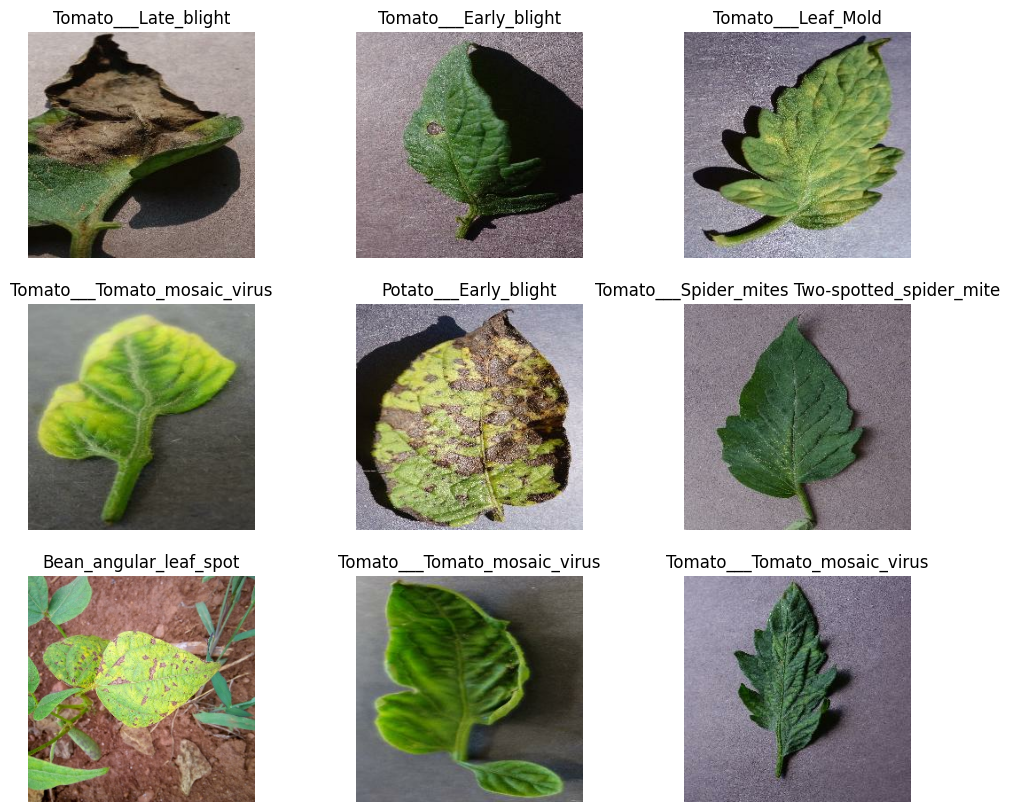

In [24]:
plt.figure(figsize = (12,10))
for image_batch, labels_batch in trainData.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [25]:
# Save the model if needed
model.save("Transfer_learning_with_VGG16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
trainData = tf.keras.preprocessing.image_dataset_from_directory('/content/Crops_disease_dataset/Train')

Found 11951 files belonging to 22 classes.


In [27]:
# Evaluate the model on a test dataset if available
test_generator = test_datagen.flow_from_directory(
    '/content/Crops_disease_dataset/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1497 images belonging to 22 classes.


In [31]:
testData = tf.keras.preprocessing.image_dataset_from_directory('/content/Crops_disease_dataset/Test')

Found 1497 files belonging to 22 classes.


In [28]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 15s 318ms/step - loss: 0.1157 - accuracy: 0.9606
Test Accuracy: 96.06%


In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 9s 189ms/step - loss: 0.1157 - accuracy: 0.9606
Test Accuracy: 96.06%


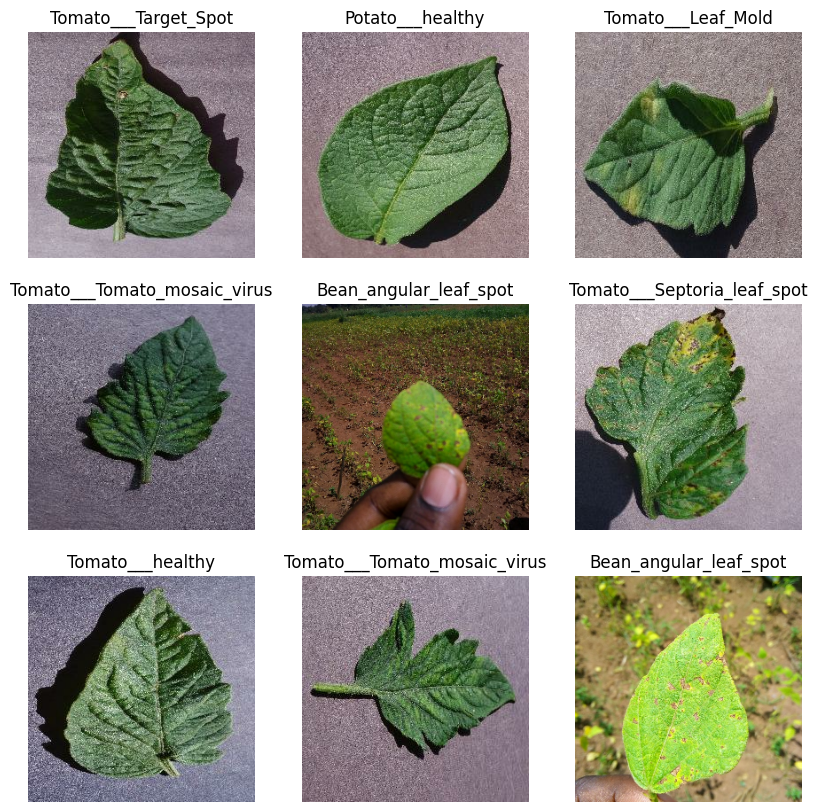

In [32]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in testData.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['accuracy']
val_loss = history.history['val_loss']

In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

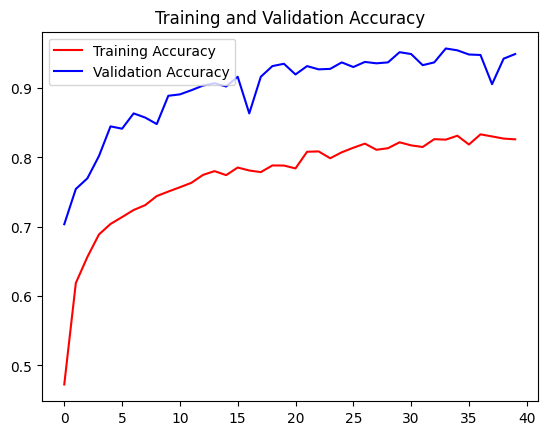

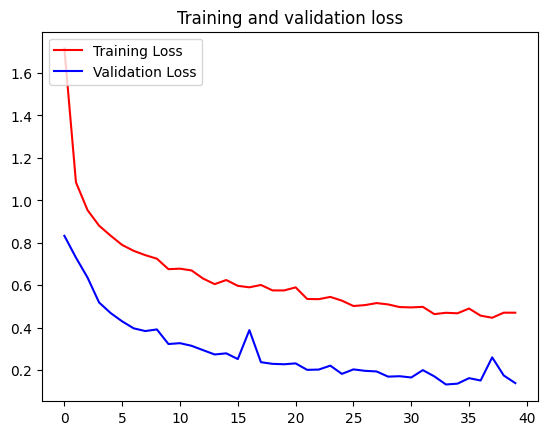

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Traning Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'upper left')
plt.figure()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation  Loss")
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')

plt.title('Training and validation loss')

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    new_image = img_array / 255.0  # Normalize the image

    predictions = model.predict(np.expand_dims(new_image, axis=0))
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    #predictions = model.predict(img_array)

    #predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

In [ ]:
import numpy as np
plt.figure(figsize=(10, 15))
for images, labels in testData.take(1):
    for i in range(6):
        ax = plt.subplot(3, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}")

        plt.axis("off")

In [39]:
class_names = testData.class_names
class_names

['Bean_angular_leaf_spot',
 'Bean_bean_rust',
 'Cauliflower_Alternaria_Leaf_Spot',
 'Cauliflower_Black_Rot',
 'Cauliflower_Cabbage aphid colony',
 'Cauliflower_Downy_Mildew',
 'Cauliflower_ring spot',
 'Paddy_Bacterial leaf blight',
 'Paddy_Brown spot',
 'Paddy_Leaf smut',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [40]:
import numpy as np
from PIL import Image
from tensorflow import keras


In [42]:
new_image = keras.preprocessing.image.load_img('/content/Crops_disease_dataset/Test/Paddy_Bacterial leaf blight/380.jpg', target_size=(224, 224))
new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0  # Normalize the image

1/1 [==============================] - 1s 1s/step


	Predicted class: Paddy_Bacterial leaf blight


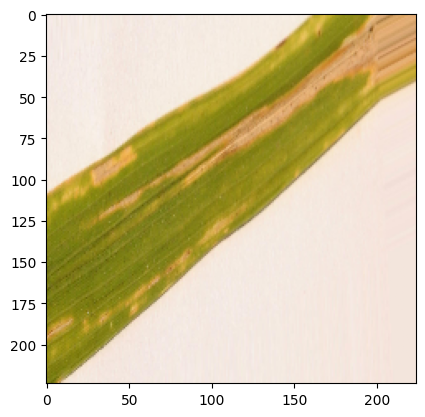

In [43]:
predictions = model.predict(np.expand_dims(new_image, axis=0))
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print("\n")
plt.imshow(new_image)
print(f"\tPredicted class: {predicted_class}")
#plt.axis("off")


In [44]:
#Cauliflower

if(predicted_class == 'Cauliflower_Downy_Mildew'):
    print("Disease Name: Cauliflower_Downy_Mildew \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(9 gm), Echo(11 gm), Follicur(9 gm)\n\nArea: 1 Satak \nWater volume: 3 Litter")

elif(predicted_class == 'Cauliflower_Alternaria_Leaf_Spot'):
    print("Disease Name: Cauliflower_Alternaria_Leaf_Spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(9 gm), Echo(11 gm), Follicur(9 gm)\n\nArea: 1 Satak \nWater volume: 3 Litter")

elif(predicted_class == 'Cauliflower_ring spot'):
    print("Disease Name: Cauliflower_ring spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(7 gm), Echo(9 gm), Follicur(7 gm), Tilt(9 gm)\n\n2) Metallex L-M\n   Trade Name: Ridomil Gold MZ(2 gm), Acrobat MZ(2 gm)\n\nArea: 1 Satak \nWater volume: 4 Litter")

elif(predicted_class == 'Cauliflower_Cabbage aphid colony'):
    print("Disease Name: Cauliflower_Cabbage aphid colony \nPesticide Name: \n1) Pyrethroids\n   Trade Name: Ambush(7 gm), Permethrin(9 gm), Beithriod: 7 gm, Isfinvalerate(9 gm)\n\nArea: 1 Satak \nWater volume: 4 Litter")

elif(predicted_class == 'Cauliflower_Black_Rot'):
    print("Disease Name: Cauliflower_Black_Rot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(7 gm), Echo(9 gm), Follicur(7 gm), Tilt(9 gm)\n\n2) Metallex L-M\n   Trade Name: Ridomil Gold MZ(2 gm), Acrobat MZ(2 gm)\n\nArea: 1 Satak \nWater volume: 3 Litter")

#Bean

elif(predicted_class == 'Bean_angular_leaf_spot'):
    print("Disease Name: Bean_angular_leaf_spot \nPesticide Name: \n1) Carbendazim\n   Trade Name: Derosal(3 ml), Bavistin(3 ml)\n\n2) Copper hydroxide\n   Trade Name: Kocide(5 ml), Champ(5 ml)\n\n3) Mancozeb\n   Trade Name: Manzate(16 mg), Dithane M-45(16 mg)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Bean_bean_rust'):
    print("Disease Name: Bean_bean_rust \nPesticide Name: \n1) Propiconazole\n   Trade Name: Tilt(2 ml), Banner MAXX(2 ml)\n\n2) Tebuconazole\n   Trade Name: Folicur(2 ml), Elite(2 ml)\n\n3) Trifloxystrobin\n   Trade Name: Cabrio(5 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

#Potato

elif(predicted_class == 'Potato___Late_blight'):
    print("Disease Name: Potato___Late_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(6 mg), Eco(8 gm), Manjat(6 mg), Follicur(6 gm)\n\n2) Mancozeb\n   Trade Name: Dithen M45(9 gm), Maneb(9 gm), Manjat 200(11 gm)\n\nArea: 1 Satak \nWater volume: 4 Litter")

elif(predicted_class == 'Potato___Early_blight'):
    print("Disease Name: Potato___Early_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(7 mg), Eco(9 gm), Manjat(7 mg), Follicur(7 gm)\n\n2) Pyraclostrobin\n   Trade Name: PreXor(3 ml), The headline(2 ml), Tilt Excel(2 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Potato___healthy'):
    print("Threre is no Diseases")

#Paddy

elif(predicted_class == 'Paddy_Bacterial leaf blight'):
    print("Disease Name: Paddy_Bacterial leaf blight \nPesticide Name: \n1) Streptomycin\n   Trade Name: Agrimycin(1 gm), Streptomycin Sulphate(2 gm), Blasticidin(1 gm)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Paddy_Brown spot'):
    print("Disease Name: Paddy_Brown spot \nPesticide Name: \n1) Tricyclazole\n   Trade Name: Belliton(1 gm), Triphyrin(1 gm), Trizol(1 gm)\n\nArea: 1 Satak \nWater volume: 2 Litter")

elif(predicted_class == 'Paddy_Leaf smut'):
    print("Disease Name: Paddy_Leaf Smart \nPesticide Name: \n1) Carbendazim\n   Trade Name: Bevistin(1 gm), Vitavex(1 gm), Fundazole(1 gm)\n\nArea: 1 Satak \nWater volume: 1 Litter")

#Tomato

elif(predicted_class == 'Tomato___Bacterial_spot'):
    print("Disease Name: Tomato___Bacterial_spot \nPesticide Name: \n1) Copper hydroxide\n   Trade Name: Kocide(10 ml), Champ(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Streptomycin\n   Trade Name: Agri-mycin 17(10 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Early_blight'):
    print("Disease Name: Tomato___Early_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Azoxystrobin\n   Trade Name: Quadris(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Late_blight'):
    print("Disease Name: Tomato___Late_blight \nPesticide Name: \n1) Copper hydroxide\n   Trade Name: Kocide(10 ml), Champ(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Mefenoxam\n   Trade Name: Ridomil Gold MZ(10 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Leaf_Mold'):
    print("Disease Name: Tomato___Early_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Tebuconazole\n   Trade Name: Luna Experience(5 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Septoria_leaf_spot'):
    print("Disease Name: Tomato___Septoria_leaf_spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Azoxystrobin\n   Trade Name: Quadris(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Spider_mites Two-spotted_spider_mite'):
    print("Disease Name: Tomato___Spider_mites Two-spotted_spider_mite \nPesticide Name: \n1) Abamectin\n   Trade Name: Avid(1 ml)\n\n2) Bifenthrin\n   Trade Name: Brigade(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Target_Spot'):
    print("Disease Name: Tomato___Target_Spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Azoxystrobin\n   Trade Name: Quadris(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___Tomato_mosaic_virus'):
    print("Disease Name: Tomato___Tomato_mosaic_virus \nPesticide Name: \n1) Abamectin\n   Trade Name: Avid(1 ml)\n\n2) Bifenthrin\n   Trade Name: Brigade(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Tomato___healthy'):
    print("There is no Diseases")


Disease Name: Paddy_Bacterial leaf blight 
Pesticide Name: 
1) Streptomycin
   Trade Name: Agrimycin(1 gm), Streptomycin Sulphate(2 gm), Blasticidin(1 gm)

Area: 1 Satak 
Water volume: 1 Litter
